In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [28]:
# ^ Split the data as input and output features
X = pd.DataFrame(diabetes.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
y = diabetes.target

In [29]:
# ^ Train - Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [30]:
# ^ Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

treeregressor = DecisionTreeRegressor()

treeregressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [31]:
# ^ Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_regressor = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [None, 3, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

regressor = DecisionTreeRegressor()

grid = GridSearchCV(regressor, param_grid=param_regressor, cv=5, scoring='neg_mean_squared_error')

In [32]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [33]:
print(grid.best_estimator_)
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      splitter='random')
123
{'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
-3484.4383573574873


In [34]:
# prediction
y_pred = grid.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.2219566848595511
53.87403475350551
4554.882146926244


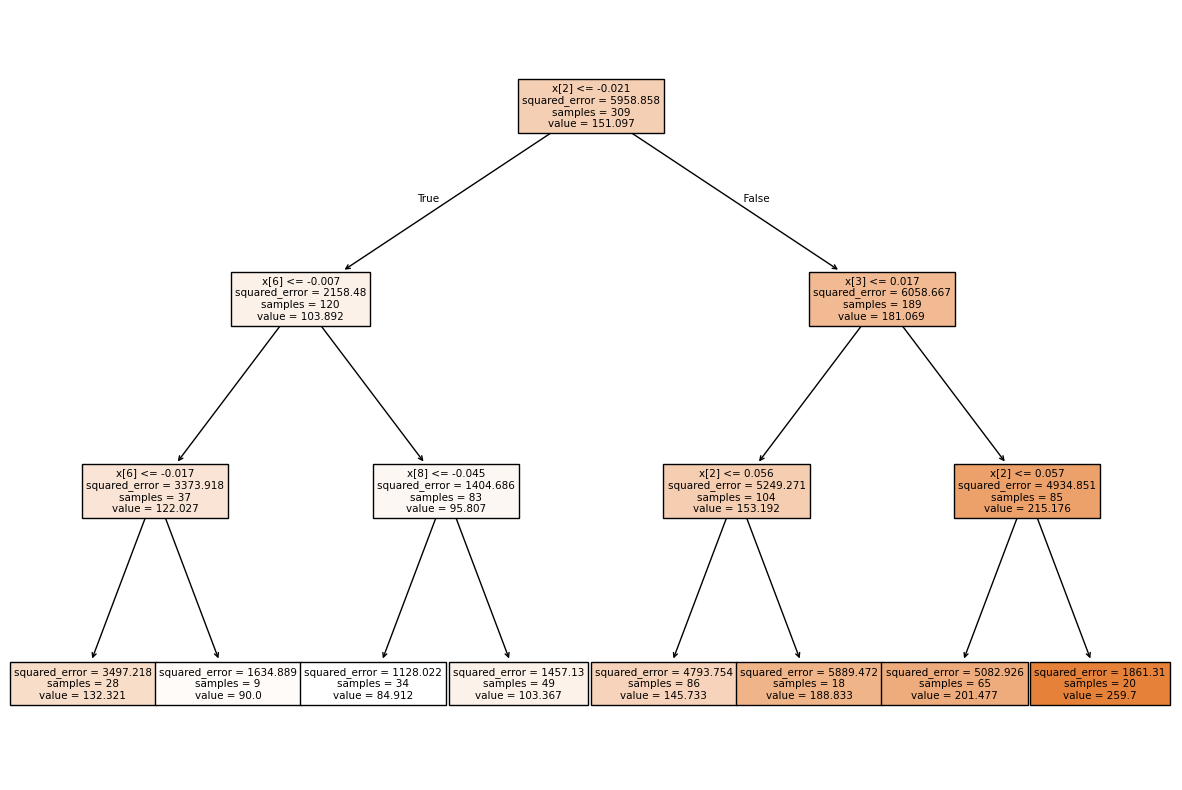

In [36]:
# Visualize the Decision tree

regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter='random')

regressor.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(regressor, filled=True)
plt.show()